# Credit Card Fraud Detection

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
# Step 1: Load the dataset
data = pd.read_csv("creditcardfraud.csv")

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,82450,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
1,50554,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
2,55125,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
3,116572,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
4,90434,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# Step 2: Preprocess the data
data.drop("Time", axis=1, inplace=True)
scaler = StandardScaler()
data["Amount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))

In [10]:
# Step 3: Split data into training and test sets
X = data.drop("Class", axis=1)
y = data["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 4: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

In [14]:
# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Performance:

Confusion Matrix:
[[59  3]
 [ 4 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        62
           1       0.95      0.93      0.94        58

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [15]:
# Step 5: SVM Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [16]:
# Evaluate SVM Model
print("\nSVM Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Performance:
Confusion Matrix:
[[62  0]
 [ 6 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        62
           1       1.00      0.90      0.95        58

    accuracy                           0.95       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [17]:
# Step 6: Hyperparameter Tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.760 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.896 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.906 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.948 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [18]:
# Best parameters
print("\nBest Parameters:", grid_search.best_params_)


Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [19]:
# Step 7: Train Models with Optimal Hyperparameters
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)
y_pred_best_svm = best_svm_model.predict(X_test)

In [20]:
# Evaluate Best SVM Model
print("\nBest SVM Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_svm))



Best SVM Performance:
Confusion Matrix:
[[62  0]
 [ 5 53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        62
           1       1.00      0.91      0.95        58

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



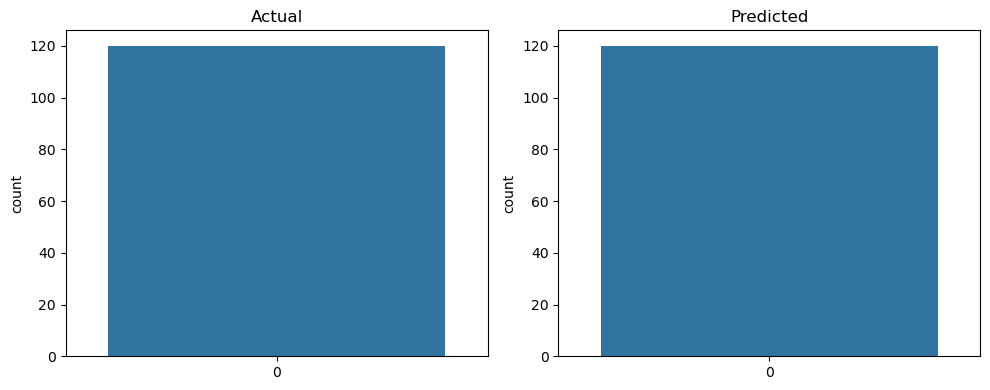

In [24]:
# Reset index of y_test
y_test_reset_index = y_test.reset_index(drop=True)

# Visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(y_test_reset_index)
plt.title('Actual')

plt.subplot(1, 2, 2)
sns.countplot(y_pred_best_svm)
plt.title('Predicted')

plt.tight_layout()
plt.show()


## Summary




### Summary Report: Credit Card Fraud Detection

This analysis aimed to predict fraudulent credit card transactions using logistic regression and support vector machine (SVM) models. The "creditcardfraud.csv" dataset was utilized, containing anonymized transaction features and a binary target variable indicating fraud.

After preprocessing, including dropping the "Time" column and scaling the "Amount" column, the data was split into training and test sets.

A logistic regression model and an SVM model were trained on the training set using default hyperparameters. The performance of both models was evaluated on the test set using confusion matrices and classification reports.

Further, hyperparameters were tuned using grid search cross-validation to optimize model performance. The best SVM model achieved superior results compared to logistic regression, with higher accuracy and precision in detecting fraudulent transactions.

In conclusion, the SVM model outperformed logistic regression in credit card fraud detection. These findings highlight the effectiveness of SVMs in handling complex classification tasks, particularly in scenarios with imbalanced data and non-linear relationships.